![alt text](images/Kusto.jpg "Kusto Magic")

# Kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from github and install/update
(if latest version is already installed you can skip this step)

In [ ]:
#!pip install Kqlmagic --upgrade

## If you want to pre-set defaults, set environment varaible, before activation notebook, or within notebook
- **KQLMAGIC_NOTEBOOK_APP** - set the notebook application (default **jupyternotebook**)
- **KQLMAGIC_LOAD_MODE** - set the kqlmagic load mode (default **verbose**). If silent, it will load without welcome output
- **KQLMAGIC_CONFIGURATION** - modify the default configuration, key=value pairs must be separated by a **semicolon**

- **KQLMAGIC_CONNECTION_STR** - set the default connection string (default **None**). If set it will connect to it on Kqlmagic load

In [1]:
# you can try it within the notebook, by setting the environment variable using %env magic

#%env KQLMAGIC_NOTEBOOK_APP=jupyterlab
#%env KQLMAGIC_LOAD_MODE=silent
#%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"

#%env KQLMAGIC_CONNECTION_STR=loganalytics://tenant='<your-tenat-id>';clientid='<your-aad-appid>';clientsecret='<your-aad-key>';workspace='<your-workspace-id>';alias='<your-workspace-friendly-name>'

## Add Kqlmagic to notebook magics


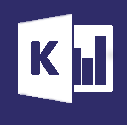

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#%pushd C:\My Projects\jupyter-Kqlmagic-microsoft\azure
%reload_ext Kqlmagic
#%popd

  - ### <span style="color:#82CAFA">*Note: information is included in the Kqlmagic banner, and in the note below it, with version and location of the open source code*</span>
  - ### <span style="color:#82CAFA">*Note: after Kqlmagic was loaded, kql reference was added to Help menu (Help tab)*</span>

## Connect to workspace@loganalytics
there are few options to authenticate with Log Analytics:<br>
- **loganalytics://code&semi;workspace=&apos;&lt;workspace-id&gt;&apos;&semi;alias=&apos;&lt;workspace-friendly-name&gt;&apos;**<br>
- **loganalytics://tenant=&apos;&lt;tenant-id&gt;&apos;&semi;clientid=&apos;&lt;aad-appid&gt;&apos;&semi;clientsecret=&apos;&lt;aad-appkey&gt;&apos;&semi;workspace=&apos;&lt;workspace-id&gt;&apos;&semi;alias=&apos;&lt;workspace-friendly-name&gt;&apos;**<br>
- **loganalytics://username=&apos;&lt;username&gt;&apos;&semi;password=&apos;&lt;password&gt;&apos;&semi;workspace=&apos;&lt;workspace-id&gt;&apos;&semi;alias=&apos;&lt;workspace-friendly-name&gt;&apos;**<br><br>
Notes:<br>
(1) authentication with appkey works only for the demo.<br>
(2) username/password works only on corporate network.<br>
(3) alias is optional.<br>
(4) if credentials are missing, and a previous connection was established the credentials will be inherited.<br>
(5) if secret (password / clientsecret) is missing, user will be prompted to provide it.<br>
(6) if tenant is missing, and a previous connection was established the tenant will be inherited.

In [84]:
%kql loganalytics://workspace='DEMO_WORKSPACE';appkey='DEMO_KEY';alias='myworkspace'

  - ### <span style="color:#82CAFA">*Note - popup window that opened with the database@cluster schema*</span>
  - ### <span style="color:#82CAFA">*Note - Help menu contains the databse@cluster schema*</span>

## Once connected you can query the current database@cluster

In [4]:
%kql Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10

ResourceGroup,count_
contosoazurehq,2446369
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247542
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446369},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247542},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

## Python code can access the result by the \_ variable

In [5]:
_

ResourceGroup,count_
contosoazurehq,2446369
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247542
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446369},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247542},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

## Converts result data to a dataframe

In [6]:
df = _.to_dataframe()
df

,ResourceGroup,count_
0,contosoazurehq,2446369
1,contosoonpremhq,950419
2,contosoautomation,566454
3,aztest,339832
4,contosoretail100,266503
5,contosovma6ab,250005
6,ContosoRetailDev1,247542
7,contosoiis,233345
8,contosoa2ademo2,231644
9,kncon,220846


In [7]:
df.head()

,ResourceGroup,count_
0,contosoazurehq,2446369
1,contosoonpremhq,950419
2,contosoautomation,566454
3,aztest,339832
4,contosoretail100,266503


In [10]:
df.ResourceGroup

0       contosoazurehq
1      contosoonpremhq
2    contosoautomation
3               aztest
4     contosoretail100
5        contosovma6ab
6    ContosoRetailDev1
7           contosoiis
8      contosoa2ademo2
9                kncon
Name: ResourceGroup, dtype: object

In [11]:
df.min()

ResourceGroup    ContosoRetailDev1
count_                      220846
dtype: object

In [12]:
df.to_json()

'{"ResourceGroup":{"0":"contosoazurehq","1":"contosoonpremhq","2":"contosoautomation","3":"aztest","4":"contosoretail100","5":"contosovma6ab","6":"ContosoRetailDev1","7":"contosoiis","8":"contosoa2ademo2","9":"kncon"},"count_":{"0":2446369,"1":950419,"2":566454,"3":339832,"4":266503,"5":250005,"6":247542,"7":233345,"8":231644,"9":220846}}'

In [13]:
df.columns

Index(['ResourceGroup', 'count_'], dtype='object')

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [14]:
_

Index(['ResourceGroup', 'count_'], dtype='object')

In [15]:
_kql_raw_result_

ResourceGroup,count_
contosoazurehq,2446369
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247542
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446369},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247542},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

In [16]:
_

ResourceGroup,count_
contosoazurehq,2446369
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247542
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446369},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247542},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

## Show a chart, render the query to the proper chart

In [17]:
%kql Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render piechart title='my apple pie' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [contosoazu…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446381},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247553},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

  - ### <span style="color:#82CAFA">*Note: the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [18]:
%kql my_bar_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [19]:
my_bar_chart

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446381},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247553},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

## Access table data

In [20]:
my_bar_chart.show_table()

ResourceGroup,count_
contosoazurehq,2446381
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247553
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


In [21]:
my_bar_chart[1]

{'ResourceGroup': 'contosoonpremhq', 'count_': 950419}

In [22]:
my_bar_chart[1][1:]

{'count_': 950419}

In [24]:
my_bar_chart[1]['ResourceGroup']

'contosoonpremhq'

In [25]:
my_bar_chart[1:5]

[{'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503}]

## Cell mixed with single line kql queries 

In [26]:
%kql bar_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

+-------------------+---------+
|   ResourceGroup   |  count_ |
+-------------------+---------+
|   contosoazurehq  | 2446381 |
|  contosoonpremhq  |  950419 |
| contosoautomation |  566454 |
|       aztest      |  339832 |
|  contosoretail100 |  266503 |
|   contosovma6ab   |  250005 |
| ContosoRetailDev1 |  247553 |
|     contosoiis    |  233345 |
|  contosoa2ademo2  |  231644 |
|       kncon       |  220846 |
+-------------------+---------+


FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446381},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247553},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [contosoazu…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446393},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247566},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

  - ### <span style="color:#82CAFA">*Note: single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [27]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ 
    | limit 10
    | render columnchart title='my column chart' 

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446393},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566454},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247566},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

  - ### <span style="color:#82CAFA">*Note: that this is a multiline magic, it starts with \%\%. It can include only kql code*</span>

## Show last chart result as a table

In [28]:
_.show_table()

ResourceGroup,count_
contosoazurehq,2446393
contosoonpremhq,950419
contosoautomation,566454
aztest,339832
contosoretail100,266503
contosovma6ab,250005
ContosoRetailDev1,247566
contosoiis,233345
contosoa2ademo2,231644
kncon,220846


## Show last result in a popup window

In [29]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

  - ### <span style="color:#82CAFA">*Note: when you F5, you loose the latest chart display state*</span>

## Show last chart result as a table in a popup window

In [30]:
_kql_raw_result_.popup_table()

## More complex chart

In [31]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ 
    | limit 10
    | extend count2 = count_*count_ 
    | limit 10 
    | render piechart title='my pie chart #2' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 0.475], 'y': [0.0, 1.0]},
              'labels': [contosoa…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446407, 'count2': 5984907209649},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566455, 'count2': 320871267025},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247576, 'count2': 61293875776},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736},
 {'ResourceGroup': 'kncon', 'count_': 220846, 'count2': 48772955716}]

## Convert result data to dictionary of columns

In [32]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

{'ResourceGroup': ('contosoazurehq', 'contosoonpremhq', 'contosoautomation', 'aztest', 'contosoretail100', 'contosovma6ab', 'ContosoRetailDev1', 'contosoiis', 'contosoa2ademo2', 'kncon'), 'count_': (2446407, 950419, 566455, 339832, 266503, 250005, 247576, 233345, 231644, 220846), 'count2': (5984907209649, 903296275561, 320871267025, 115485788224, 71023849009, 62502500025, 61293875776, 54449889025, 53658942736, 48772955716)}


In [33]:
_kql_raw_result_.to_csv('csv_file.csv')
#%cat csv_file.csv

csv results at C:\My Projects\jupyter-Kqlmagic-microsoft\notebooks\csv_file.csv

# Get last kql query attributes 

## Query string

In [34]:
_kql_raw_result_.query

"Heartbeat \n    | where ResourceGroup != '' \n    | summarize count() by ResourceGroup \n    | sort by count_ \n    | limit 10\n    | extend count2 = count_*count_ \n    | limit 10 \n    | render piechart title='my pie chart #2'"

## Query render title

In [35]:
_kql_raw_result_.title

'my pie chart #2'

## Query render visualization

In [36]:
_kql_raw_result_.visualization

'piechart'

## Number of records in query response 

In [37]:
_kql_raw_result_.records_count

10

## List of columns in query table response

In [38]:
_kql_raw_result_.columns_name

['ResourceGroup', 'count_', 'count2']

## Kqlmagic time metric (in seconds)

In [39]:
_kql_raw_result_.start_time

1539856772.9746506

In [40]:
_kql_raw_result_.end_time

1539856776.7007174

In [41]:
_kql_raw_result_.elapsed_timespan

3.726066827774048

## Query connection database@cluster

In [42]:
_kql_raw_result_.connection

'myworkspace@loganalytics'

## Query Options (settings) 

In [43]:
_kql_raw_result_.options

{'auto_dataframe': False,
 'short_errors': True,
 'feedback': True,
 'show_conn_info': 'current',
 'columns_to_local_vars': False,
 'show_query_time': True,
 'enable_suppress_result': True,
 'plotly_fs_includejs': False,
 'popup_window': False,
 'auto_limit': 0,
 'display_limit': None,
 'prettytable_style': 'DEFAULT',
 'last_raw_result_var': '_kql_raw_result_',
 'table_package': 'prettytable',
 'plot_package': 'plotly',
 'dsn_filename': 'odbc.ini',
 'validate_connection_string': True,
 'auto_popup_schema': True,
 'json_display': 'formatted',
 'popup_help': False,
 'popup_schema': False,
 'palette_colors': 10,
 'palette_desaturation': 1.0,
 'params_dict': None,
 'palette_name': 'tab10',
 'temp_folder_name': 'Kqlmagic_temp_files',
 'cache_folder_name': 'Kqlmagic_cache_files',
 'export_folder_name': 'Kqlmagic_exported_files',
 'notebook_app': 'jupyternotebook',
 'add_kql_ref_to_help': True,
 'add_schema_to_help': True,
 'cache': False,
 'use_cache': False,
 'version': False,
 'palette': F

## Completion query information (query metadata)

In [44]:
_kql_raw_result_.completion_query_info

{
    "Count": 11,
    "StatusCode": 0,
    "StatusDescription": "Query completed successfully"
}

## Completion query resource consumption (query metadata)

In [45]:
_kql_raw_result_.completion_query_resource_consumption

{
    "ExecutionTime": 0.0625049,
    "dataset_statistics": [
        {
            "table_row_count": 10,
            "table_size": 308
        }
    ],
    "input_dataset_statistics": {
        "extents": {
            "scanned": 151,
            "total": 151
        },
        "rows": {
            "scanned": 10881003,
            "total": 10881003
        },
        "rowstores": {
            "scanned_rows": 0
        }
    },
    "resource_usage": {
        "cache": {
            "disk": {
                "hits": 0,
                "misses": 0,
                "total": 0
            },
            "memory": {
                "hits": 24979,
                "misses": 0,
                "total": 24979
            }
        },
        "cpu": {
            "kernel": "00:00:00.1250000",
            "total cpu": "00:00:01.2968750",
            "user": "00:00:01.1718750"
        },
        "memory": {
            "peak_per_node": 234882368
        }
    }
}

In [46]:
_kql_raw_result_.completion_query_resource_consumption['resource_usage']['cache']['memory']['hits']

24979

## Query raw json response

In [47]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "ResourceGroup",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [
                [
                    "contosoazurehq",
                    2446407,
                    5984907209649
                ],
                [
                    "contosoonpremhq",
                    950419,
                    903296275561
                ],
                [
                    "contosoautomation",
                    566455,
                    320871267025
                ]

In [48]:
_kql_raw_result_.raw_json['Tables'][1]['TableName']

'Table_1'

In [49]:
_kql_raw_result_.raw_json['Tables'][1]['Columns'][0]['ColumnName']

'Value'

In [50]:
_kql_raw_result_.raw_json['Tables'][3]['Rows'][0][1]

'QueryResult'

# Advanced part

## Kql query with option -c2lv (-columns_to_local_vars)

In [51]:
%%kql -c2lv 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: option are specified before the query*</span>
  - ### <span style="color:#82CAFA">*Note: c2lv is abbreviation of columns_to_local_vars options*</span>
  - ### <span style="color:#82CAFA">*Note: columns_to_local_vars option returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [52]:
ResourceGroup

('contosoazurehq',
 'contosoonpremhq',
 'contosoautomation',
 'aztest',
 'contosoretail100',
 'contosovma6ab',
 'ContosoRetailDev1',
 'contosoiis',
 'contosoa2ademo2',
 'kncon')

In [53]:
count_

(2446420,
 950419,
 566455,
 339832,
 266503,
 250005,
 247591,
 233345,
 231644,
 220846)

## Kql query with option -ph (-popup_help)

In [54]:
%kql -ph

  - ### <span style="color:#82CAFA">*Note - current database@cluster is always shown*</span>

## Kql query with negated option -f (-feedback)

In [56]:
%%kql -!feedback 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | render columnchart title='my bar chart'

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2446420},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 566455},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247591},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644},
 {'ResourceGroup': 'kncon', 'count_': 220846}]

  - ### <span style="color:#82CAFA">*Note: the feedback message 'Done..... records' was not displayed because of the negated feedback option*</span>
  - ### <span style="color:#82CAFA">*Note: option is negated by adding \! before the option*</span>
  - ### <span style="color:#82CAFA">*Note: full option name instead of abbreviation can be used too*</span>
  - ### <span style="color:#82CAFA">*Note: feedback option is on by default, so to turn it off, it must be negated*</span>

## Get default value of optionfeedback (f)

In [57]:
%config Kqlmagic.feedback

True

  - ### <span style="color:#82CAFA">*Note: options have defaults, and can be accessed to read or modify using %config magic*</span>

## Set default value of option feedback (f) to False

In [59]:
%config Kqlmagic.feedback=False
%config Kqlmagic.feedback

False

In [60]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 5

ResourceGroup,count_,count2
contosoazurehq,2446430,5985019744900
contosoonpremhq,950419,903296275561
contosoautomation,566455,320871267025
aztest,339832,115485788224
contosoretail100,266503,71023849009


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446430, 'count2': 5985019744900},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566455, 'count2': 320871267025},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009}]

  - ### <span style="color:#82CAFA">*Note: feedback message was not displayed, because the default feedback option was set to False*</span>

In [61]:
%config Kqlmagic.feedback=True
%config Kqlmagic.feedback

True

## Kql query with option -version (print kqlmagic version)

In [62]:
%kql -version

Kqlmagic version: 0.1.53


## Show all option defaults with help

In [63]:
%config Kqlmagic

Kqlmagic options
--------------
Kqlmagic.add_kql_ref_to_help=<Bool>
    Current: True
    On Kqlmagic load auto add kql reference to Help menu.
Kqlmagic.add_schema_to_help=<Bool>
    Current: True
    On connection to database@cluster add  schema to Help menu.
Kqlmagic.auto_dataframe=<Bool>
    Current: False
    Return Pandas dataframe instead of regular result sets. Abbreviation: ad
Kqlmagic.auto_limit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets. Abbreviation: al
Kqlmagic.auto_popup_schema=<Bool>
    Current: True
    Popup schema when connecting to a new database. Abbreviation: aps
Kqlmagic.cache=<Bool>
    Current: False
    Cache query results.
Kqlmagic.cache_folder_name=<Unicode>
    Current: 'Kqlmagic_cache_files'
    Set the folder name for cache files
Kqlmagic.columns_to_local_vars=<Bool>
    Current: False
    Return data into local variables from column names. Abbreviation: c2lv
Kqlmagic.display_limit=<Int>
    Current: None
    Automati

## Show query results in a popup window

In [64]:
%%kql -pw 
    let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
    | limit 1000
    | extend e1 = randn()
    | extend e2 = randn()
    | extend e3 = randn()
    | extend e4 = randn()
    | extend e5 = randn()
    | project e1,e2,e3,e4,e5
    | render scatterchart title="Michael's chart"

[{'e1': 7.715426411694385, 'e2': 9.020223891779965, 'e3': 4.651603075934262, 'e4': 5.7542297104299855, 'e5': 7.076409120583515},
 {'e1': 6.5790183559429884, 'e2': 7.323987783602865, 'e3': 6.649535529403654, 'e4': 6.169280675630285, 'e5': 4.560413719297979},
 {'e1': 7.156471318664143, 'e2': 8.013427984073015, 'e3': 7.778543082213131, 'e4': 5.3581441424116125, 'e5': 5.30375960426671},
 {'e1': 4.907667125865018, 'e2': 8.391088005097084, 'e3': 8.37237222177425, 'e4': 7.3152501171385245, 'e5': 7.965817637971469},
 {'e1': 6.810420431463384, 'e2': 6.547580431190244, 'e3': 7.688342532933562, 'e4': 8.704448026122442, 'e5': 7.531749578491575},
 {'e1': 6.732247046920501, 'e2': 9.042456623200893, 'e3': 5.472918383313912, 'e4': 7.21465549442976, 'e5': 5.7858354260177345},
 {'e1': 6.007843524143091, 'e2': 7.931338733631265, 'e3': 5.986003334418363, 'e4': 6.183312318663864, 'e5': 7.947840224563537},
 {'e1': 6.31524739283309, 'e2': 7.776672735247059, 'e3': 7.6350452767979, 'e4': 5.254903547791052, 'e5': 6.655691917632664},
 {'e1': 7.15479895271782, 'e2': 6.883979596736852, 'e3': 7.5302592523675385, 'e4': 6.899295920892229, 'e5': 5.453866678297867},
 {'e1': 4.622380528383094, 'e2': 6.741483011573497, 'e3': 8.469570134376607, 'e4': 6.622510334046199, 'e5': 10.348556548120335},
 {'e1': 8.27171545288308, 'e2': 6.295896388284877, 'e3': 6.750918446044733, 'e4': 6.633959258829769, 'e5': 5.543251736412134},
 {'e1': 7.709524969702034, 'e2': 6.528833076574842, 'e3': 7.583112090155009, 'e4': 6.445806074584885, 'e5': 6.938880352643252},
 {'e1': 5.914943018815657, 'e2': 9.071130145749809, 'e3': 6.255080828481582, 'e4': 9.001467428266864, 'e5': 7.616090993507474},
 {'e1': 5.92198714437883, 'e2': 7.052411794928838, 'e3': 6.904413136054808, 'e4': 5.524010148722217, 'e5': 5.853300886558183},
 {'e1': 6.688187922929363, 'e2': 5.980213272738129, 'e3': 6.751570650781511, 'e4': 6.52989766390715, 'e5': 7.185872119693236},
 {'e1': 7.9798070524402185, 'e2': 6.755103587020957, 'e3': 6.99844595236602, 'e4': 6.808447080768399, 'e5': 6.866811811048338},
 {'e1': 5.737306014733538, 'e2': 7.764366767310066, 'e3': 7.602982676161123, 'e4': 6.775447030073124, 'e5': 6.237502670545021},
 {'e1': 7.317232856639463, 'e2': 7.2975484859152715, 'e3': 6.377536482862384, 'e4': 6.757299691122783, 'e5': 7.15931197552699},
 {'e1': 3.201229942604347, 'e2': 7.1175700153350805, 'e3': 8.367772862970751, 'e4': 7.848369498674888, 'e5': 8.600143484141842},
 {'e1': 6.780591079226902, 'e2': 6.825484763591917, 'e3': 7.188823238692747, 'e4': 5.811844574021519, 'e5': 6.126347462839798},
 {'e1': 7.121774785441089, 'e2': 5.559721728818848, 'e3': 7.716816331406988, 'e4': 5.356444208724361, 'e5': 8.523050443913494},
 {'e1': 6.873402968713259, 'e2': 6.8173182519602245, 'e3': 8.673174886186612, 'e4': 5.716484872301804, 'e5': 6.987349219827699},
 {'e1': 9.109499299812988, 'e2': 7.3710938397332795, 'e3': 6.12687061439461, 'e4': 6.352622615293698, 'e5': 7.004116387692255},
 {'e1': 7.2557583010828095, 'e2': 6.751374528766862, 'e3': 7.334141335704197, 'e4': 8.1379711487082, 'e5': 7.777077543767249},
 {'e1': 8.729102818059488, 'e2': 6.3048012958108774, 'e3': 6.507198261668386, 'e4': 7.543130974611475, 'e5': 6.817001808194685},
 {'e1': 6.427614152829603, 'e2': 6.950884683092517, 'e3': 7.2837823650125895, 'e4': 7.29321477462156, 'e5': 7.7034105892963},
 {'e1': 6.521907524691359, 'e2': 7.491560826855648, 'e3': 6.502740775869643, 'e4': 5.309126668154703, 'e5': 9.00217538501575},
 {'e1': 7.789414164893974, 'e2': 8.702465541739919, 'e3': 6.064602913572186, 'e4': 6.57730474800845, 'e5': 4.922717379787597},
 {'e1': 6.503960004911614, 'e2': 7.737828062292309, 'e3': 4.7730516094311515, 'e4': 7.615565611853567, 'e5': 7.3936750436910215},
 {'e1': 7.727498263168636, 'e2': 8.82028651929333, 'e3': 6.316101350513051, 'e4': 6.6401958326479935, 'e5': 7.3442706265985604},
 {'e1': 6.668757252709848, 'e2': 6.861013946790052, 'e3': 6.257317494880085, 'e4': 7.197402913041238, 'e5': 6.545564555694485},
 {'e1': 6.747872938470961, 'e2': 7

  - ### <span style="color:#82CAFA">*Note: popup_window option (abbr: pw) cause the result to be displayed in a popup window*</span>

## Empty table

In [65]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 0

ResourceGroup,count_,count2


[]

In [66]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 0
    | render piechart title='my chart'

[]

In [67]:
len(_kql_raw_result_)

0

In [68]:
_kql_raw_result_.popup()

In [69]:
_kql_raw_result_.show_table()

ResourceGroup,count_,count2


In [70]:
df = _kql_raw_result_.to_dataframe()
df

,ResourceGroup,count_,count2


In [71]:
df.to_json()

'{"ResourceGroup":{},"count_":{},"count2":{}}'

In [72]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "ResourceGroup",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [],
            "TableName": "Table_0"
        },
        {
            "Columns": [
                {
                    "ColumnName": "Value",
                    "ColumnType": "string",
                    "DataType": "String"
                }
            ],
            "Rows": [
                [
                    "{\"Visualization\":\"piechart\",\"Title\":\"my chart\",\"XColumn\":null,\"Series\":null,\

## Kql request with fork - return multiple tables

In [76]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | fork (limit 10) (project ResourceGroup 
                       | limit 5)

ResourceGroup,count_,count2
contosoazurehq,2446445,5985093138025
contosoonpremhq,950419,903296275561
contosoautomation,566456,320872399936
aztest,339832,115485788224
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
ContosoRetailDev1,247615,61313188225
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736
kncon,220846,48772955716


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446445, 'count2': 5985093138025},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566456, 'count2': 320872399936},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247615, 'count2': 61313188225},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736},
 {'ResourceGroup': 'kncon', 'count_': 220846, 'count2': 48772955716}]

In [77]:
_kql_raw_result_.fork_result(1)

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
contosoretail100


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'contosoretail100'}]

## Submit same query

In [78]:
 _kql_raw_result_.submit()

ResourceGroup,count_,count2
contosoazurehq,2446445,5985093138025
contosoonpremhq,950419,903296275561
contosoautomation,566456,320872399936
aztest,339832,115485788224
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
ContosoRetailDev1,247615,61313188225
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736
kncon,220846,48772955716


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446445, 'count2': 5985093138025},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566456, 'count2': 320872399936},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247615, 'count2': 61313188225},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736},
 {'ResourceGroup': 'kncon', 'count_': 220846, 'count2': 48772955716}]

In [79]:
 _kql_raw_result_.fork_result(1)

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
contosoretail100


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'contosoretail100'}]

## Refresh query

In [80]:
_kql_raw_result_.fork_result(1).refresh()

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
contosoretail100


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'contosoretail100'}]

In [81]:
_kql_raw_result_.fork_result(0)

ResourceGroup,count_,count2
contosoazurehq,2446459,5985161638681
contosoonpremhq,950419,903296275561
contosoautomation,566456,320872399936
aztest,339832,115485788224
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
ContosoRetailDev1,247628,61319626384
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736
kncon,220846,48772955716


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446459, 'count2': 5985161638681},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566456, 'count2': 320872399936},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247628, 'count2': 61319626384},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736},
 {'ResourceGroup': 'kncon', 'count_': 220846, 'count2': 48772955716}]

In [82]:
_kql_raw_result_

ResourceGroup,count_,count2
contosoazurehq,2446459,5985161638681
contosoonpremhq,950419,903296275561
contosoautomation,566456,320872399936
aztest,339832,115485788224
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
ContosoRetailDev1,247628,61319626384
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736
kncon,220846,48772955716


[{'ResourceGroup': 'contosoazurehq', 'count_': 2446459, 'count2': 5985161638681},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 566456, 'count2': 320872399936},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 247628, 'count2': 61319626384},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736},
 {'ResourceGroup': 'kncon', 'count_': 220846, 'count2': 48772955716}]